In [217]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

rows = cols = 512
bands = 204
bits = 16
lambda_min = 397
lambda_max = 1004
lambda_step = (lambda_max-lambda_min) / bands

capture_id = '2018-08-17_053'
root_dir = 'C:/CVL/CIMA/materialanalysen/HSI'
raw_dir = os.path.join(root_dir, capture_id, 'capture')
raw_file = os.path.join(raw_dir, '%s.raw' % capture_id)
dref_file = os.path.join(raw_dir, 'DARKREF_%s.raw' % capture_id)
wref_file = os.path.join(raw_dir, 'WHITEREF_%s.raw' % capture_id)

#read data
with open(raw_file, mode='rb') as file: # b is important -> binary
    raw_bts = file.read()
with open(dref_file, mode='rb') as file: # b is important -> binary
    dref_bts = file.read()
with open(wref_file, mode='rb') as file: # b is important -> binary
    wref_bts = file.read()

In [183]:
#reshape raw cube
raw_data = np.float32(np.frombuffer(raw_bts, dtype=np.float16))
raw_data = np.reshape(raw_data, (rows, bands, cols))
raw_data = np.rot90(raw_data, k=3, axes=(0,2))

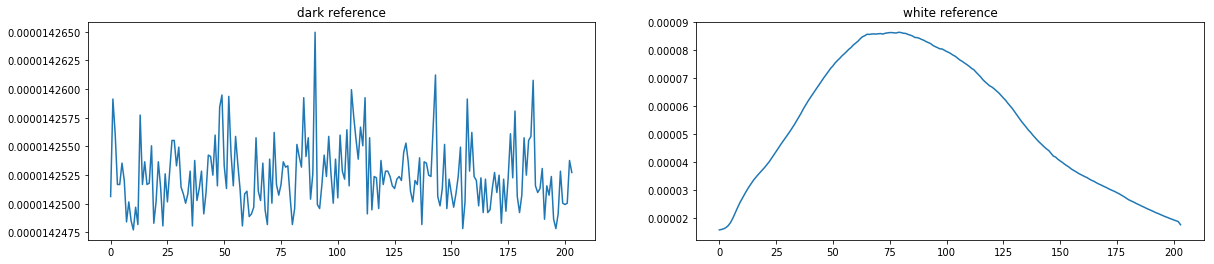

In [278]:
#read white and black ref
dref_data = np.float32(np.frombuffer(dref_bts, dtype=np.float16))
wref_data = np.float32(np.frombuffer(wref_bts, dtype=np.float16))

ref_size = int(len(dref_data)/(bands))


#todo: is this the correct way to treat the references??
dref_data = np.reshape(dref_data, (bands, ref_size))  
wref_data = np.reshape(wref_data, (bands, ref_size))
dref = np.mean(dref_data, axis=1)
wref = np.mean(wref_data, axis=1)

f, (dplot, wplot) = plt.subplots(1,2)
dplot.plot(range(bands),dref)
dplot.set_title('dark reference')
wplot.plot(range(bands),wref)
wplot.set_title('white reference')
f.set_figwidth('20')
plt.show()

In [279]:
refl = raw_data
for i in range(bands):
    refl[:,i,:] = (raw_data[:,i,:]-dref[i]) / (wref[i]-dref[i])

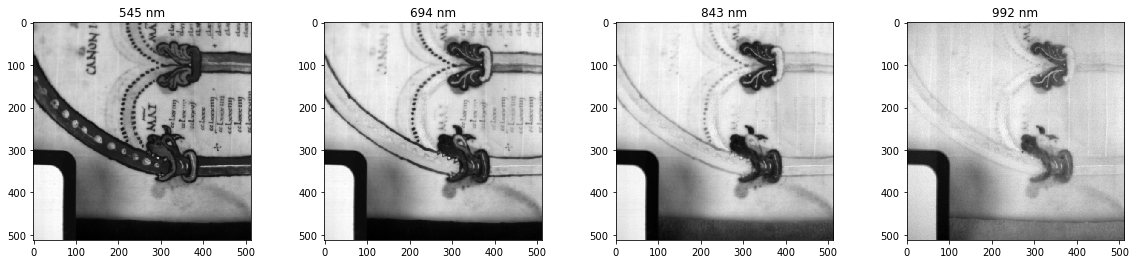

In [280]:
f, axarr = plt.subplots(1,4)
for i in range(4):
    layer = (i+1)*50
    axarr[i].imshow(refl[:,layer ,:], cmap='gray')
    axarr[i].set_title('%d nm' % (lambda_min+layer*lambda_step))
f.set_figwidth('20')
plt.show()

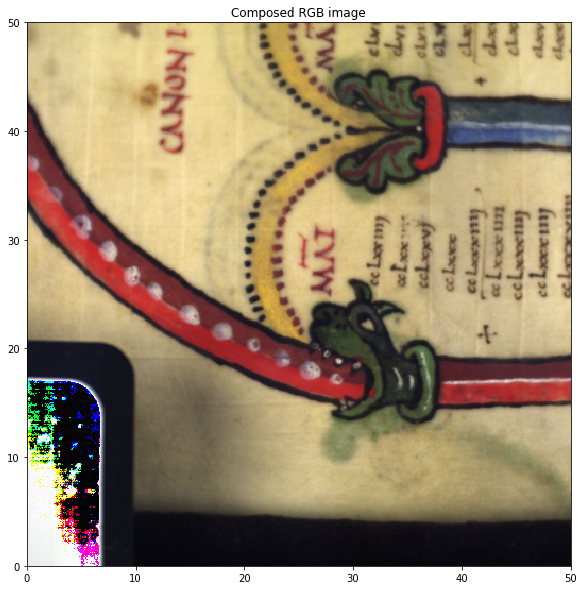

In [281]:
r = 598
g = 548
b = 449
rgb = np.dstack((refl[:,int((r-lambda_min)/lambda_step),:], 
               refl[:,int((g-lambda_min)/lambda_step),:], 
               refl[:,int((b-lambda_min)/lambda_step),:]))
plt.figure(figsize=(10, 10))
plt.title('Composed RGB image')
plt.imshow(rgb, extent=(0,50,0,50))
plt.show()